# What contributes to lung cancer deaths and what can we do?
We aim to address the critical issue of lung cancer through a comprehensive data-driven approach. By leveraging predictive analytics, geospatial data, and historical trends, our project seeks to uncover underlying patterns and risk factors associated with lung cancer. Through our analysis, we aspire to contribute to effective strategies that can mitigate the impact of this devastating disease, promoting longer and healthier lives.

![Literate_Programming](p4.jpg)
![Literate_Programming](p0.jpg)

## Part 1: Merging and processing Data

We can create a comprehensive lung cancer death dataset that covers data from multiple files for easy historical data analysis or trend analysis.

In [13]:
import pandas as pd
import os

base_file_path = os.path.join("data_csv/", "a.Lung cancer deaths EU & US longer time period.csv")
base_df = pd.read_csv(base_file_path)

other_files = [f for f in os.listdir("data_csv/") if f.endswith('.csv') and f != "a.Lung cancer deaths EU & US longer time period.csv"]

merged_df = base_df.copy()
for file in other_files:
    file_path = os.path.join("data_csv/", file)
    print(file_path)
    df = pd.read_csv(file_path)
    df = df.drop(columns=['Entity'], errors='ignore')

    merged_df = merged_df.merge(df, on=['Code', 'Year'], how='outer')

merged_df.to_csv('merged_data.csv', index=False)

data_csv/b.sales-of-cigarettes-per-adult-per-day.csv
data_csv/f.public-health-expenditure-share-gdp.csv
data_csv/e.pm25-exposure-gdp 14 years.csv
data_csv/g.life-expectancy-hmd-unwpp.csv
data_csv/d.UK & US emissions-of-air-pollutants 27 years.csv
data_csv/c.air pollutant emissions US & HUN.csv
data_csv/h.access-to-clean-fuels-and-technologies-for-cooking.csv


In [14]:
merged_df.shape

(19449, 26)

In [15]:
merged_df[(merged_df['Code'] == 'USA') & (merged_df['Year'] > 1960)].head(5)

,Code,Entity,Year,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population,Manufactured cigarettes sold per adult per day,public_health_expenditure_pc_gdp,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",...,Ammonia (Index),Sulphur dioxide (Index),Nitrogen oxide (NOx),Sulphur dioxide (SO鈧) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH鈧) emissions,Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total
18428,USA,United States,1961,38929.0,2.287893,19.750927,21.266054,10.7,1.161500,NaN,...,NaN,NaN,17196596.0,20693066.0,122067360.0,701979.56,22633518.0,348453.56,2515911.2,NaN
18429,USA,United States,1962,41376.0,2.355299,20.653361,22.258445,10.6,1.178456,NaN,...,NaN,NaN,17939212.0,21412274.0,126468856.0,699471.75,23375630.0,356025.84,2652803.0,NaN
18430,USA,United States,1963,43568.0,2.402361,21.426990,23.093763,10.8,1.220847,NaN,...,NaN,NaN,18837646.0,22231424.0,130487384.0,684876.25,24134058.0,352851.56,2752941.5,NaN
18431,USA,United States,1964,45838.0,2.549316,22.188101,23.952427,10.3,1.220847,NaN,...,NaN,NaN,19697346.0,23140526.0,134714770.0,663258.44,24868110.0,349030.20,2826117.0,NaN
18432,USA,United States,1965,48483.0,2.652046,23.125053,25.014705,10.5,1.237803,NaN,...,NaN,NaN,20439006.0,24377838.0,138343310.0,655684.06,25603198.0,353011.78,2985927.8,NaN


In [16]:
merged_df.columns

Index(['Code', 'Entity', 'Year', 'Number',
       'Percentage of cause-specific deaths out of total deaths',
       'Age-standardized death rate per 100 000 standard population',
       'Death rate per 100 000 population',
       'Manufactured cigarettes sold per adult per day',
       'public_health_expenditure_pc_gdp',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'GDP per capita, PPP (constant 2017 international $)',
       'Life expectancy - Type: period - Sex: both - Age: 0', 'PM₁₀ (Index)',
       'PM₂.₅ (Index)', 'Non-methane volatile organic compounds (Index)',
       'Nitrogen oxides (Index)', 'Ammonia (Index)', 'Sulphur dioxide (Index)',
       'Nitrogen oxide (NOx)', 'Sulphur dioxide (SO鈧) emissions',
       'Carbon monoxide (CO) emissions', 'Organic carbon (OC) emissions',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'Black carbon (BC) emissions', 'Ammonia (NH鈧) emissions',
       'Proportion of populati

The combined dataset, merged_df, was screened for 2021 and sorted by "age-standardised death rates per 100,000 standard population" in order to identify the top five records with the highest death rates

In [19]:
data_2021 = merged_df[merged_df['Year'] == 2021].sort_values(
    by='Age-standardized death rate per 100 000 standard population', 
    ascending=False
)
data_2021.head(5)

,Code,Entity,Year,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population,Manufactured cigarettes sold per adult per day,public_health_expenditure_pc_gdp,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",...,Ammonia (Index),Sulphur dioxide (Index),Nitrogen oxide (NOx),Sulphur dioxide (SO鈧) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH鈧) emissions,Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total
7922,HUN,Hungary,2021,7867.0,5.055230,39.671053,81.657319,NaN,5.303,NaN,...,NaN,NaN,97307.445,14066.39,338867.3,24581.133,110771.06,4717.3413,92114.41,100.0
15993,SRB,Serbia,2021,4615.0,3.377933,32.056748,67.526776,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.6
7619,HRV,Croatia,2021,2814.0,4.487179,31.338165,72.544826,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
14269,POL,Poland,2021,20866.0,4.016423,27.390068,55.292903,NaN,4.785,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
18488,USA,United States,2021,134592.0,3.885191,20.976992,40.428329,NaN,NaN,NaN,...,NaN,NaN,7000289.500,1738428.40,22130986.0,439785.400,10486530.00,131700.8900,4591702.50,100.0


### EDA

Which countries have the highest death rates caused by lung cancer? 

(cited from the WHO Mortality Database https://platform.who.int/mortality/themes/theme-details/topics/indicator-groups/indicator-group-details/MDB/trachea-bronchus-lung-cancers)

![Literate_Programming](countries.jpg)

Age-standardised rates (ASR) are a summary measure of the rate of disease that a population would have if it had a standard age structure. Standardisation is necessary when comparing populations that differ with respect to age because age has a powerful influence on the risk of developing/dying from cancer.

Hungary has been having the highest death rates. And the US seems to be doing a really good job reducing deaths caused by trachea, bronchus, lung cancers!

Visualize trends in several key indicators (e.g., mortality, cigarette sales) for USA and HUN over the years：

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_time_series_trends(df, country_code, target_variable='Age-standardized death rate per 100 000 standard population'):
    country_df = df[df['Code'] == country_code].copy()

    exclude_cols = ['Entity', 'Code', 'Year','Number']
    numeric_cols = []
    for col in country_df.columns:
        if col not in exclude_cols:
            pd.to_numeric(country_df[col])
            numeric_cols.append(col)

    plot_df = country_df[['Year'] + numeric_cols]

    fig, ax1 = plt.subplots(figsize=(20, 12))
    ax2 = ax1.twinx()

    # Plot GDP per capita on the second y-axis
    gdp_data = plot_df[['Year', 'GDP per capita, PPP (constant 2017 international $)']]
    ax2.plot(gdp_data['Year'], gdp_data['GDP per capita, PPP (constant 2017 international $)'], label='GDP per capita', color='red', marker='o')
    ax2.set_ylabel('GDP per capita', color='red')

    # Plot other variables on the first y-axis
    other_vars = [col for col in numeric_cols if col != 'GDP per capita, PPP (constant 2017 international $)']
    for variable in other_vars:
        data = plot_df[['Year', variable]]
        ax1.plot(data['Year'], data[variable], label=variable, marker='o')

    plt.title(f'Time Series Trends for {country_code}')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Value (excluding GDP per capita)')
    all_years = sorted(plot_df['Year'].unique())
    ax1.set_xticks(all_years)
    ax1.set_xticklabels(all_years, rotation=45)

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

    plt.tight_layout()
    plt.show()

/var/folders/v9/6mztxyzj60z1wvgxnqd81v9h0000gn/T/ipykernel_18113/757320736.py:42: UserWarning: Glyph 37415 (\N{CJK UNIFIED IDEOGRAPH-9227}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37415 (\N{CJK UNIFIED IDEOGRAPH-9227}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


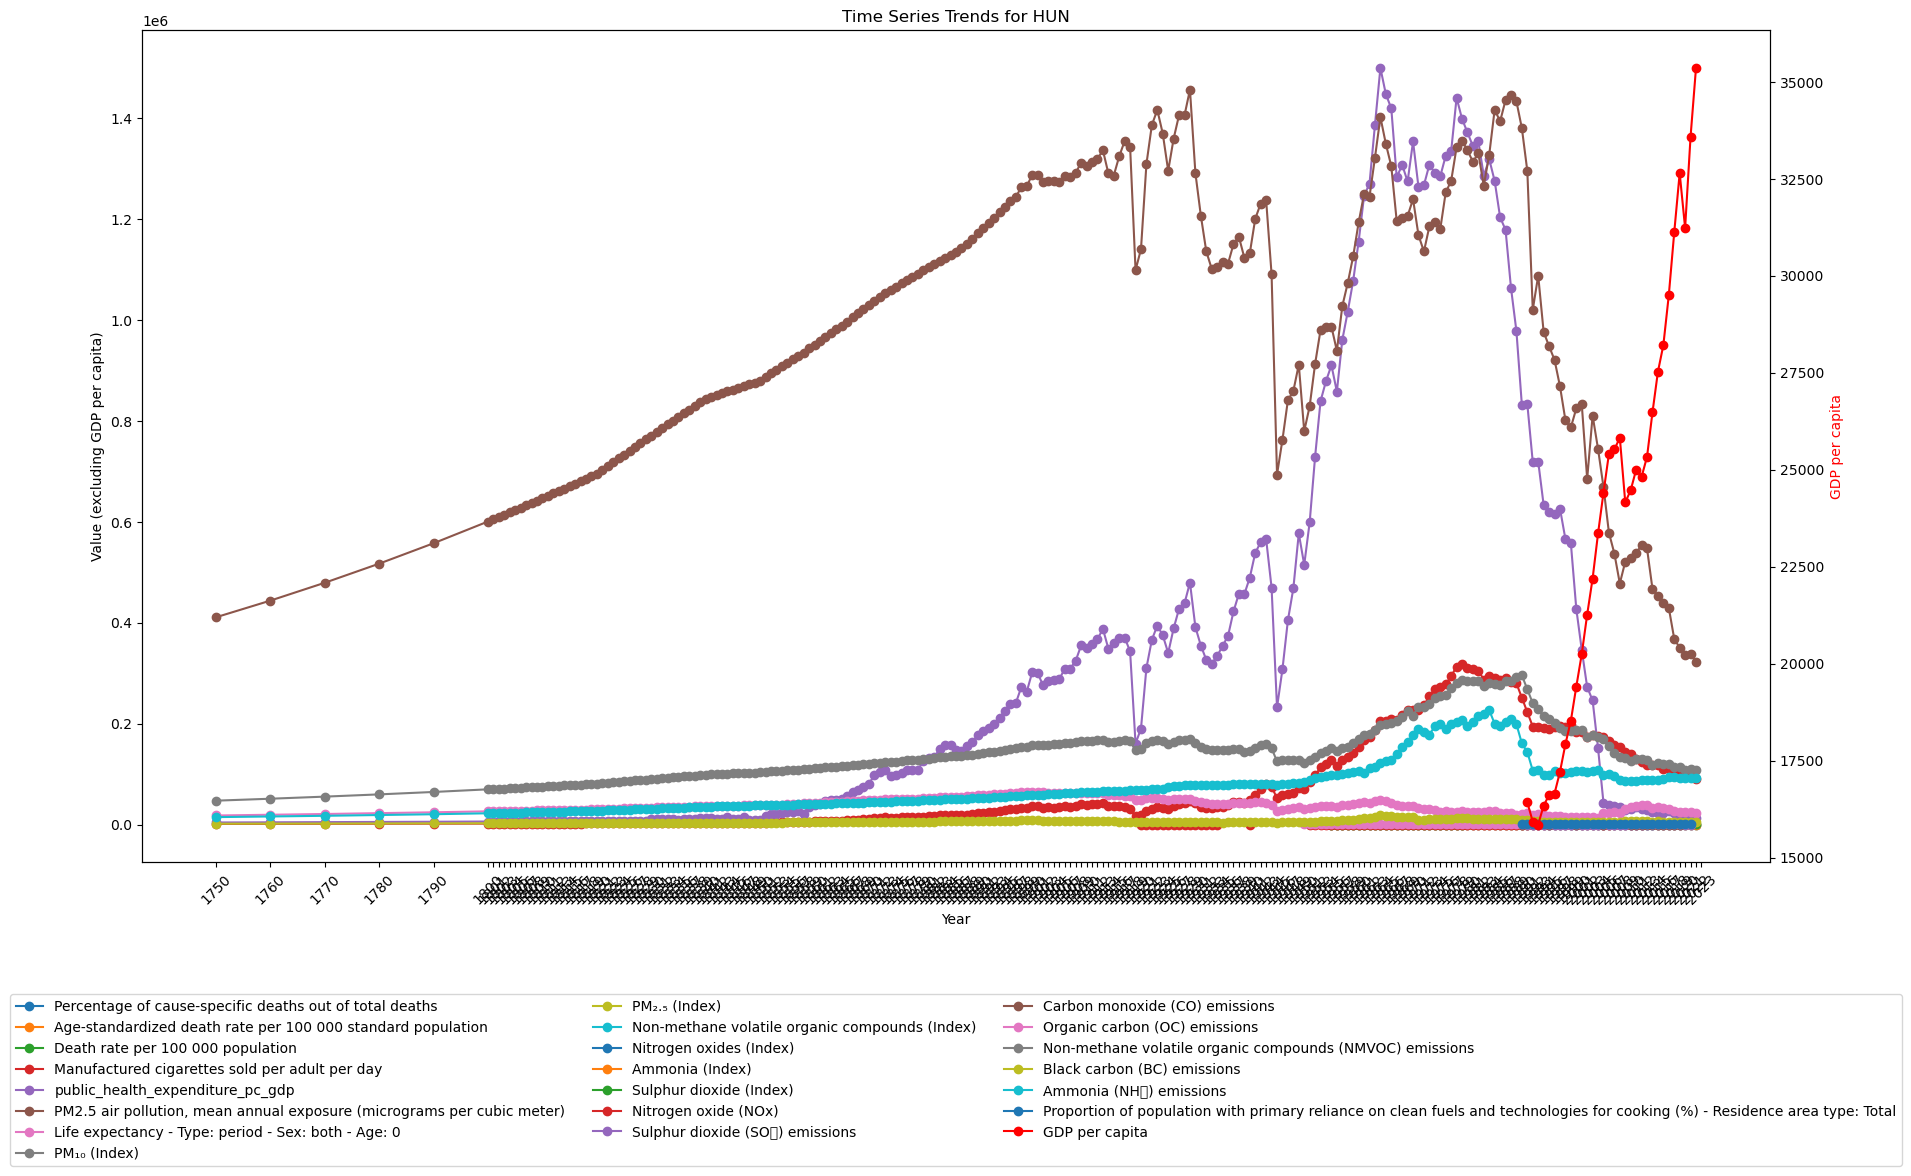

In [103]:
plot_time_series_trends(merged_df,'HUN')

Too many variables and they vary a lot in unit. It's hard to see what's going on... But we can categorize them into these factors: smoking/indoor and outdoor air pollution/age/GDP and public healthcare expenditure

Let's see the correlation in pairs. We'll assume that all countries share these common factors to assess whether specific variables demonstrate clear correlations with lung cancer mortality rates.

In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# since we are considering all countries together, we'll use the ASR and ignore the age factor.
def pairplots_for_all_countries(df, target_variable='Age-standardized death rate per 100 000 standard population'):
    # Variables of interest
    variables_of_interest = [
        'Manufactured cigarettes sold per adult per day',
        'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
        'Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total',
        'public_health_expenditure_pc_gdp',
        'GDP per capita, PPP (constant 2017 international $)'
    ]
    
    variables_of_interest.append(target_variable)
    plot_df = df[variables_of_interest].dropna()
    
    num_plots = len(variables_of_interest) - 1  
    num_rows = (num_plots + 1) // 2 
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, 6 * num_rows))
    axes = axes.flatten()
    
    # Loop through the variables and plot them
    for i, col in enumerate(variables_of_interest[:-1]):  
        sns.regplot(data=plot_df, x=col, y=target_variable, ax=axes[i], 
                    scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_variable)
        
        # Calculate and display correlation
        correlation = plot_df[col].corr(plot_df[target_variable])
        axes[i].text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
                     transform=axes[i].transAxes, 
                     verticalalignment='top')
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.suptitle('Relationship between Variables and Lung Cancer Death Rate (All Countries) \n', fontsize=14)
    plt.tight_layout()
    
    return plot_df

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


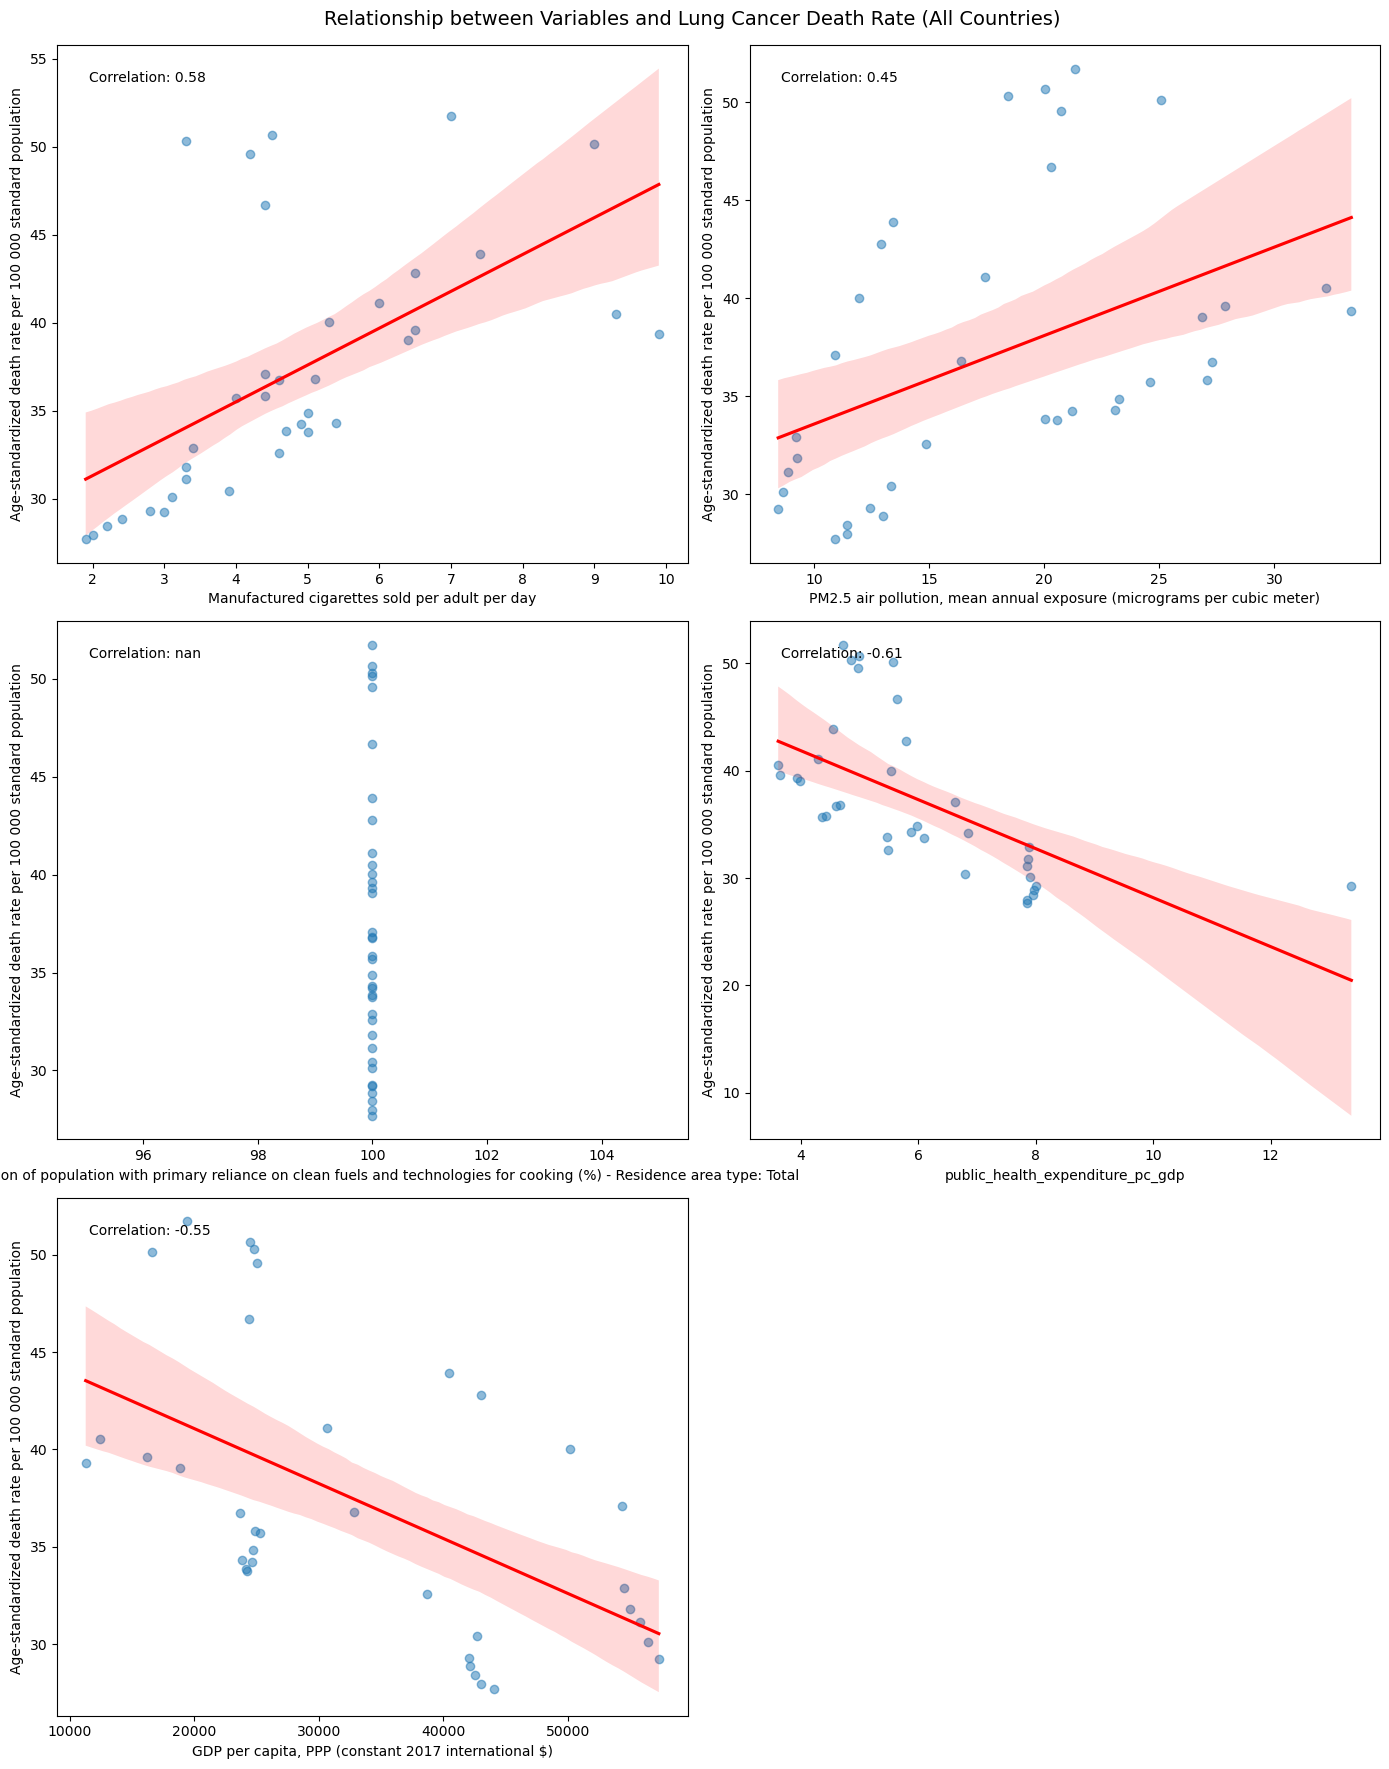

In [235]:
all_countries_data = pairplots_for_all_countries(merged_df)

In general, there is a positive correlation between lung cancer death and smoking/ pollution, and a negative corelation for GDP/ healthcare expenditure.

Now let's examine closer for a specifc country:

In [242]:
import matplotlib.pyplot as plt
import numpy as np

def pair_plot_age_standardized(df, country_code):
    country_df = df[df['Code'] == country_code].copy()
    country_df = country_df[[
        'Year',
        'Age-standardized death rate per 100 000 standard population',
        'Manufactured cigarettes sold per adult per day',
        'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
        'Carbon monoxide (CO) emissions',
        # 'Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total', --all are 100%
        'public_health_expenditure_pc_gdp',
        'GDP per capita, PPP (constant 2017 international $)'
    ]]
    
    country_df = country_df.sort_values('Year')
    
    # Target variable
    y_col = 'Age-standardized death rate per 100 000 standard population'

    numeric_cols = country_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col not in ['Year', 'Number', y_col]]
    
    country_df = country_df.dropna(subset=[y_col])
    
    num_cols = len(numeric_cols)
    num_rows = (num_cols + 1) // 2 if num_cols % 2 == 1 else num_cols // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
    axes = axes.flatten()  # Flatten the array of axes for easy iteration

    # Plot each variable, track the index of the last used subplot
    last_used_index = -1
    for i, col in enumerate(numeric_cols):
        subset_df = country_df.dropna(subset=[col])
        if not subset_df.empty:
            axes[i].scatter(subset_df[col], subset_df[y_col], alpha=0.7, color='blue')
            axes[i].set_xlabel(col, fontsize=12)
            last_used_index = i

    # Hide any unused subplots
    for j in range(last_used_index + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.2)
    plt.suptitle(f'Pairwise Plots for {country_code}', fontsize=16)
    
    return country_df

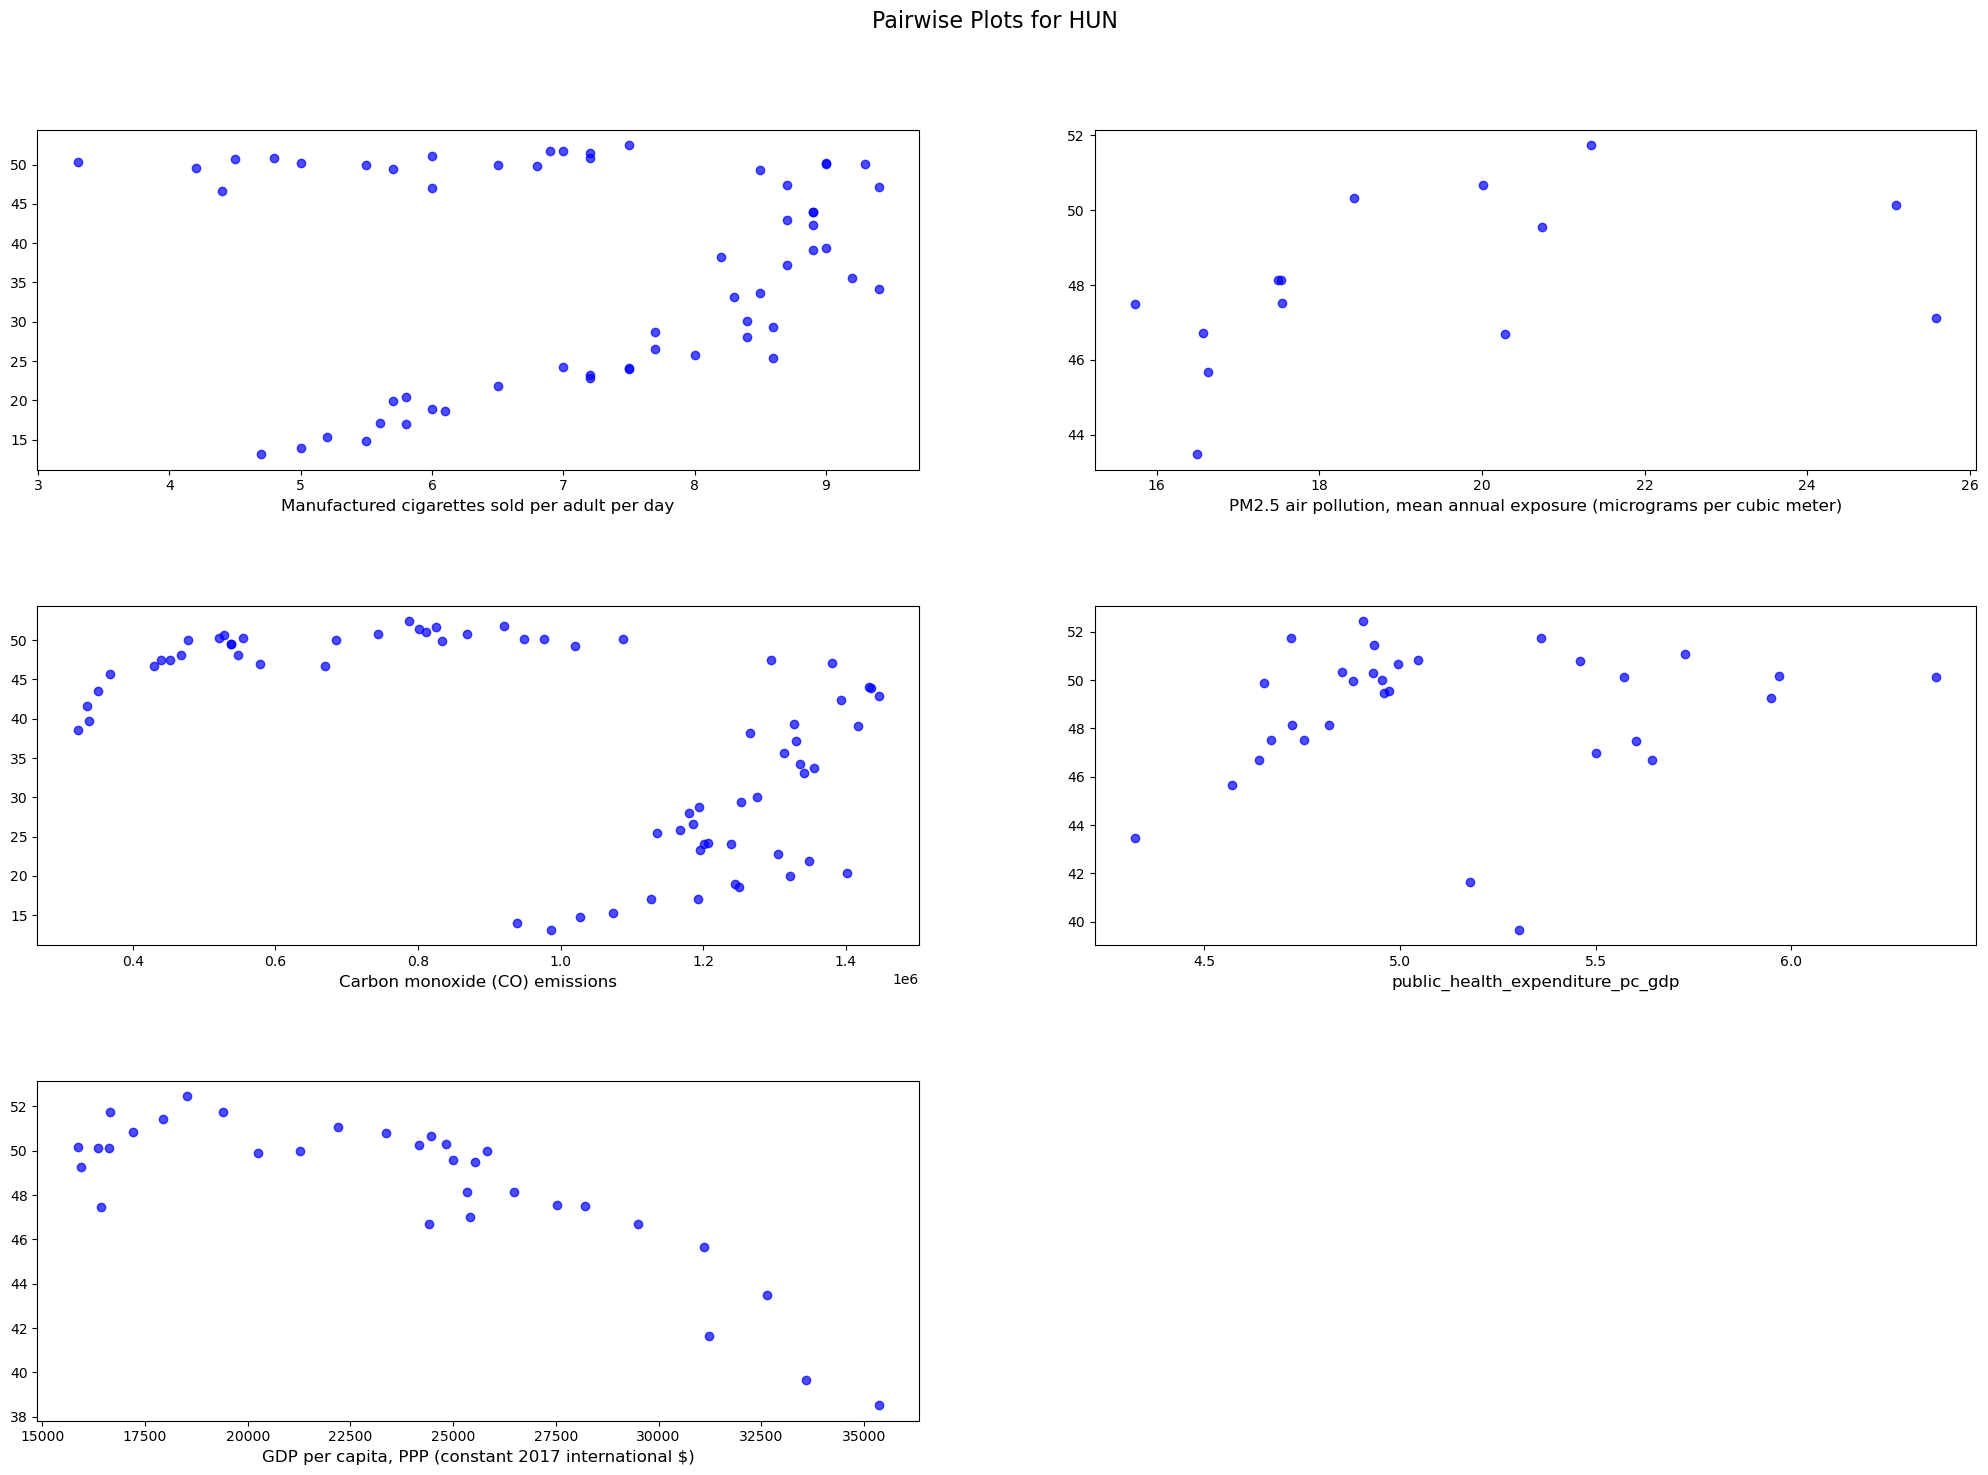

In [244]:
hun = pair_plot_age_standardized(merged_df,'HUN')

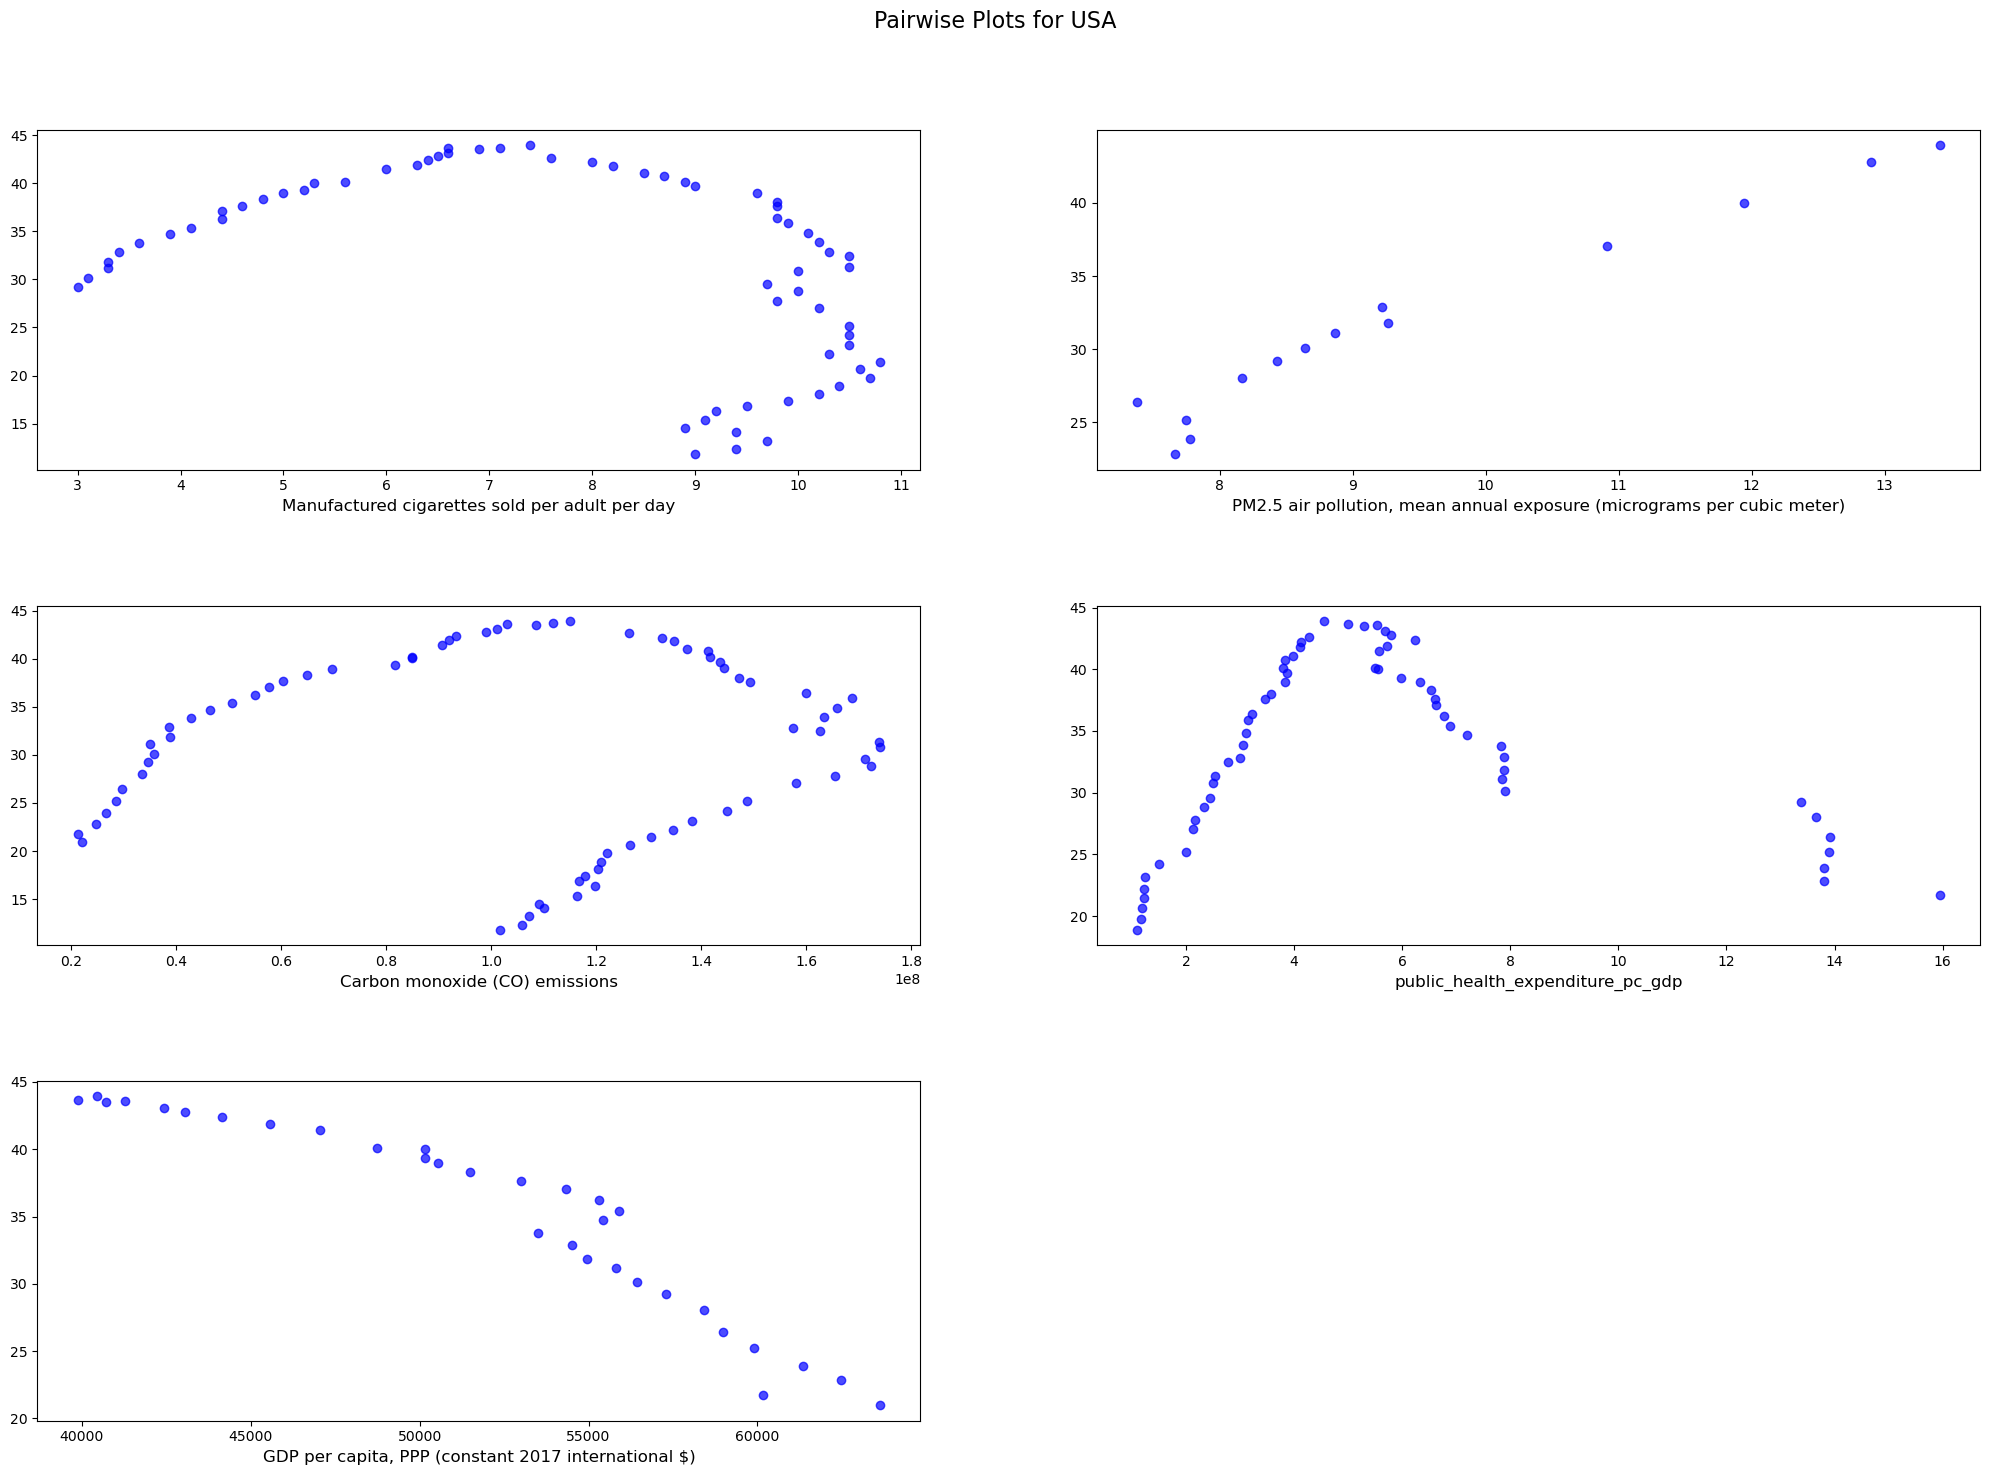

In [230]:
usa4 = pair_plot_age_standardized(merged_df,'USA')

Now let's see the time series trends for these variables that we are concerned about.
In order to better compare them, we'll normalize the data to the interval [0, 1]

In [264]:
def plot_normalized_data(df, country_code):
    columns_to_plot = [
        'Age-standardized death rate per 100 000 standard population',
        # 'Death rate per 100 000 population',
        'Manufactured cigarettes sold per adult per day',
        'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
        'Carbon monoxide (CO) emissions',
        'public_health_expenditure_pc_gdp',
        # 'PM10Primary',
        # 'Life expectancy - Type: period - Sex: both - Age: 0',
        # 'Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total'
    ]
    
    country_data = df[df['Code'] == country_code]

    # Sort by year and interpolate missing values
    country_data = country_data.sort_values('Year')
    interpolated_data = country_data[['Year'] + columns_to_plot].interpolate(method='linear', axis=0)
    
    # Normalize the data
    normalized_data = interpolated_data.copy()
    for column in columns_to_plot:
        if column in normalized_data.columns:
            normalized_data[column] = (normalized_data[column] - normalized_data[column].min()) / \
                                      (normalized_data[column].max() - normalized_data[column].min())
    
    plt.figure(figsize=(12, 8))
    for column in columns_to_plot:
        if column in normalized_data.columns:
            plt.plot(normalized_data['Year'], normalized_data[column], label=column, alpha=0.8)
    
    plt.ylim(0, 1.3)
    plt.title(f"Normalized Trends for {country_code} Over Time", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Normalized Value (0-1)", fontsize=14)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


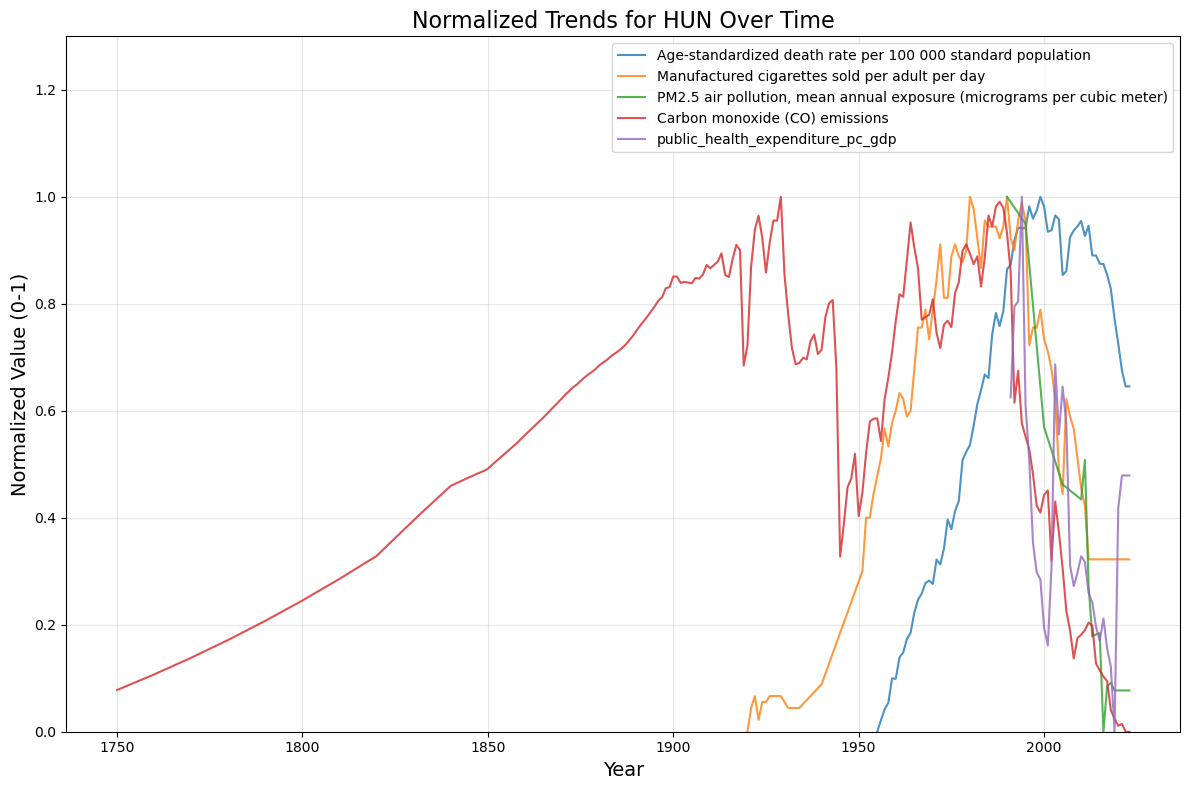

In [266]:
usa3 = plot_normalized_data(merged_df,'HUN')

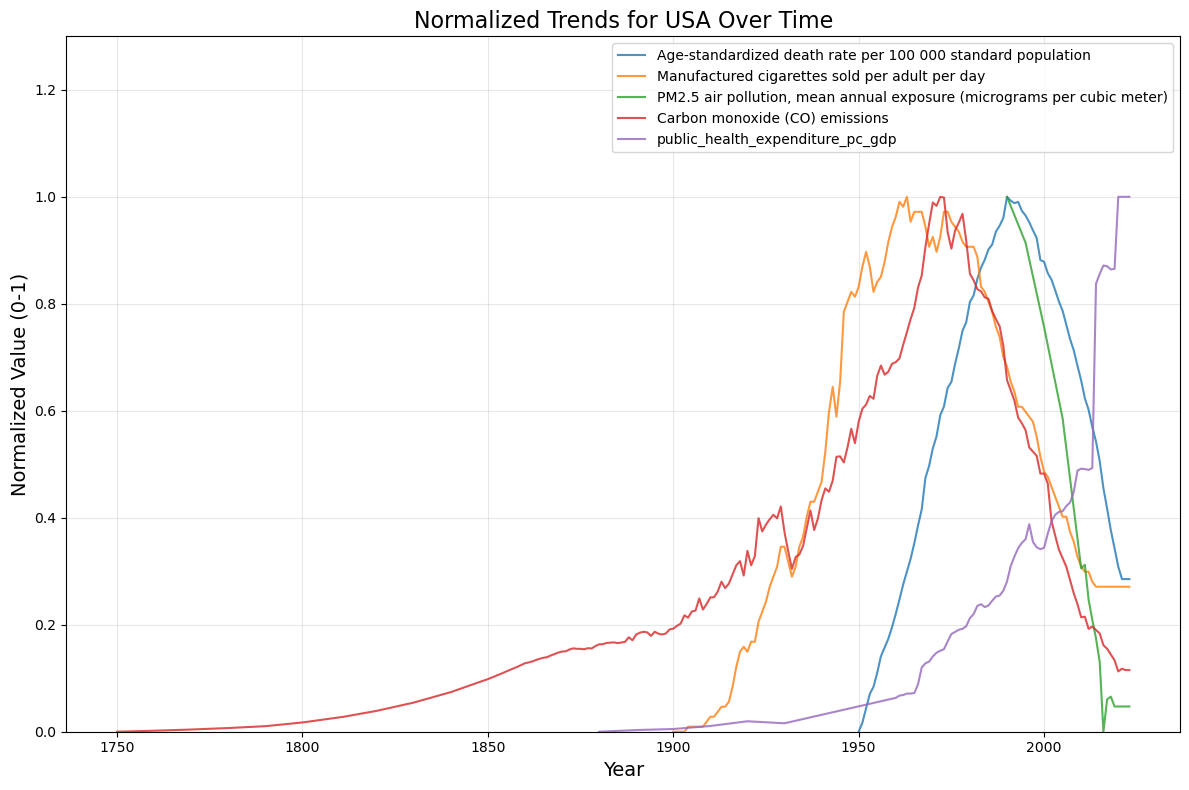

In [268]:
usa3 = plot_normalized_data(merged_df,'USA')

For both countries, the patterns for cigarette sales and lung cancer deaths look very similar, but peak at different times. 

For USA, pollution seems to have a strong effect too. 

####  💡 We should consider the time lag in smoking/pollution and lung cancer deaths...because you don't get cancer as soon as you smoke!

We think 1. Smoking contributes the most to lung cancers. 2. Countries with high GDP/better healthcare systems will have a lower death rate.

Let's try modeling our data to verify the assumption.

## Part 2: Linear Model and Bayesian Linear Regression with MCMC sampling

### Linear Model
Now, we first look at the data about the United States. We will do data cleansing, feature engineering,and use linear regression models to explore the potential impact of certain variables on lung cancer death rate.

What is a good latency to introduce to our model? From the plot it seems there is about 30-year lag. 

Research also reveals that "latency in which cancer incidence lags exposure by 10–30 y". (Lipfert, F. W., & Wyzga, R. E. (2019). Longitudinal relationships between lung cancer mortality rates, smoking, and ambient air quality: a comprehensive review and analysis. *Critical Reviews in Toxicology, 49*(9), 790–818. [https://doi.org/10.1080/10408444.2019.1700210](https://doi.org/10.1080/10408444.2019.1700210))

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

data_clean = merged_df[[
    "Code", "Entity", "Year", "Death rate per 100 000 population", 
    "Manufactured cigarettes sold per adult per day", 
    "public_health_expenditure_pc_gdp", 
    "Life expectancy - Type: period - Sex: both - Age: 0", 
    "Carbon monoxide (CO) emissions"
    # "PM10Primary"
]]
#rename the columns for easier access
data_clean.columns = ["Code", "Entity", "Year", "Death", "Cigarette", "HealthExpense", "LifeExpectancy", "CO"]

data_us = data_clean[data_clean["Code"] == "USA"]
start_year = 1950
end_year = 2020
lag = 30

filtered_data = data_us[(data_us["Year"] >= start_year) & (data_us["Year"] <= end_year)].copy() 
# find the lagged data for smoking and air pollution
filtered_data["Cigarette"] = data_us.loc[data_us["Year"].between(start_year-lag, end_year-lag), "Cigarette"].values
filtered_data["CO"] = data_us.loc[data_us["Year"].between(start_year-lag, end_year-lag), "CO"].values / 1e7

model = smf.ols("Death ~ Cigarette + CO + LifeExpectancy + HealthExpense", data=filtered_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Death   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     406.5
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           1.19e-40
Time:                        14:27:15   Log-Likelihood:                -129.79
No. Observations:                  61   AIC:                             269.6
Df Residuals:                      56   BIC:                             280.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         46.8388     30.237      1.

The model's R-squared value of 0.967 indicates that it explains a substantial portion of the variance in deaths rates. 

**The impact of cigarette sales and Carbon monoxide emissions on mortality are particularly significant (with a t-value of 16.637 and a P-value close to 0), while the effects of life expectancy and health expenditure are not statistically significant.**

Let's simplify the linear regression model mentioned earlier and use the simplified model to generate predicted values, and finally compare the predicted mortality rate with the actual mortality rate:

                            OLS Regression Results                            
Dep. Variable:                  Death   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1627.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           3.76e-58
Time:                        14:29:27   Log-Likelihood:                -152.72
No. Observations:                  71   AIC:                             311.4
Df Residuals:                      68   BIC:                             318.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9949      0.789      3.796      0.0

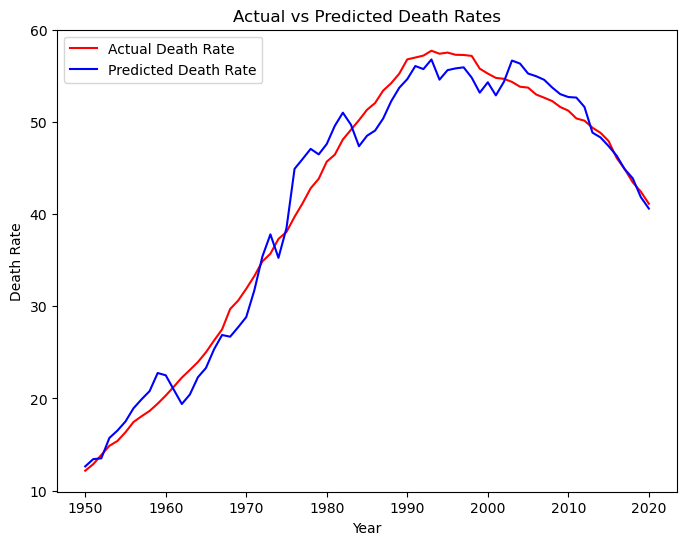

In [288]:
# Simplify the model (stepwise-like selection)
model_simplified = smf.ols("Death ~ Cigarette + CO", data=filtered_data).fit()
print(model_simplified.summary())

# Generate predictions using the simplified model
filtered_data["Cigarette"] = filtered_data["Cigarette"].interpolate()
filtered_data["Predicted_Death"] = model_simplified.predict(filtered_data[["Cigarette","CO"]]) 

# Plot true vs. predicted death rates
plt.figure(figsize=(8,6))
plt.plot(filtered_data["Year"], filtered_data["Death"], color="red", label="Actual Death Rate")
plt.plot(filtered_data["Year"], filtered_data["Predicted_Death"], color="blue", label="Predicted Death Rate")
plt.xlabel("Year")
plt.ylabel("Death Rate")
plt.title("Actual vs Predicted Death Rates")
plt.legend()
plt.show()


$$
\text{Death Rate} = 2.9949 + 4.6272 \cdot \text{Cigarette} + 0.2931 \cdot \text{CO}
$$

- Death Rate: the number of deaths caused by trachea, bronchus, lung cancers per 100,000 population
- Cigarette: the number of cigarettes sold per adult per day
- CO: carbon monoxide emissions tons per year 

**In the linear model above, we set a fixed lag of 30 years based on domain knowledge. But is that really the best latency to model our data? Can we consider cumulative effects of long-term smoking to lung cancer deaths? 
Let's try using a lagged range of time to model the death rate for Hungary, using Bayesian Linear Regression with MCMC sampling.**

In [291]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Data for Hungary
data_hun = data_clean[data_clean["Code"] == "HUN"][["Code", "Entity", "Year", "Death", "Cigarette", "CO"]]
data_hun["Cigarette"] = data_hun["Cigarette"].interpolate()
data_hun["CO"] = data_hun["CO"].interpolate()

# Precompute lagged data and add those as our new features
time_lag = np.arange(25, 35)
for lag in time_lag:
    data_hun[f"Cigarette_lag_{lag}"] = data_hun["Cigarette"].shift(lag)
    data_hun[f"Pollution_lag_{lag}"] = data_hun["CO"].shift(lag)

start_year = 1955
end_year = 2020
data_hun = data_hun[(data_hun["Year"] >= start_year) & (data_hun["Year"] <= end_year)]

with pm.Model() as hungary_model:
    beta_i = pm.Normal("beta_i", mu=0, sigma=10)
    beta_cig = pm.Normal("beta_cig", mu=0, sigma=10)
    beta_pollutant = pm.Normal("beta_pollutant", mu=0, sigma=10)
    
    # Create a tensor for all lagged variables
    cig_lags = np.column_stack([data_hun[f"Cigarette_lag_{lag}"] for lag in time_lag])
    pollution_lags = np.column_stack([data_hun[f"Pollution_lag_{lag}"] for lag in time_lag])

    # Use Dirichlet to create a probability distribution over the time range
    lag_weights = pm.Dirichlet("lag_weights", a=np.ones(len(time_lag)))
    
    # Weighted sum of lagged variables
    lagged_data_cig = pm.math.sum(cig_lags * lag_weights, axis=1)
    lagged_data_pollution = pm.math.sum(pollution_lags * lag_weights, axis=1)
    
    mu = beta_i + beta_cig * lagged_data_cig + beta_pollutant * lagged_data_pollution
    sigma = pm.HalfNormal("sigma", sigma=10)
    likelihood = pm.Normal("Death", mu=mu, sigma=sigma, observed=data_hun["Death"].values)

In [293]:
# pip install arviz

In [295]:
with hungary_model:
    trace = pm.sample(1000, tune=1000, cores=1)

pm.summary(trace, hdi_prob=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta_i, beta_cig, beta_pollutant, lag_weights, sigma]


Output()

Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 25 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_i,27.298,4.550,18.077,36.098,0.176,0.124,671.0,1028.0,1.0
beta_cig,8.017,0.157,7.719,8.322,0.005,0.003,1145.0,1449.0,1.0
beta_pollutant,-0.000,0.000,-0.000,-0.000,0.000,0.000,651.0,962.0,1.0
lag_weights[0],0.237,0.113,0.032,0.445,0.003,0.002,1132.0,747.0,1.0
lag_weights[1],0.137,0.096,0.001,0.319,0.003,0.002,1063.0,872.0,1.0
lag_weights[2],0.133,0.098,0.000,0.318,0.003,0.002,908.0,475.0,1.0
lag_weights[3],0.116,0.084,0.000,0.279,0.002,0.001,1467.0,944.0,1.0
lag_weights[4],0.058,0.052,0.000,0.160,0.001,0.001,1433.0,918.0,1.0
lag_weights[5],0.051,0.048,0.000,0.149,0.001,0.001,1607.0,1123.0,1.0
lag_weights[6],0.065,0.055,0.000,0.174,0.001,0.001,1750.0,1060.0,1.0


array([[<Axes: title={'center': 'beta_i'}>,
        <Axes: title={'center': 'beta_i'}>],
       [<Axes: title={'center': 'beta_cig'}>,
        <Axes: title={'center': 'beta_cig'}>],
       [<Axes: title={'center': 'beta_pollutant'}>,
        <Axes: title={'center': 'beta_pollutant'}>]], dtype=object)

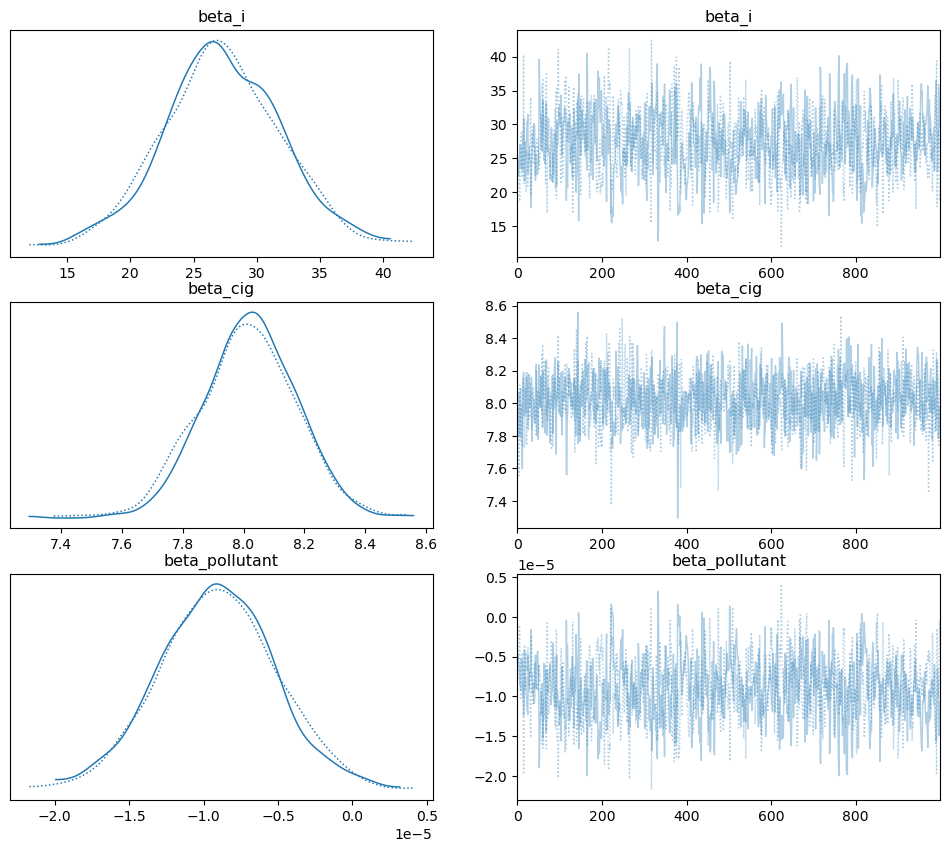

In [297]:
az.plot_trace(trace, var_names=["beta_i", "beta_cig", "beta_pollutant"],figsize=(12, 10))

The analysis of the regression coefficients for cigarette consumption (beta_cig) and pollutants (beta_pollutant) reveals that the estimate for cigarette consumption is relatively precise and stable across multiple samplings or simulations, indicated by a sharp peak in its density plot and concentrated fluctuations in the scatter plot. In contrast, the pollutant coefficient shows a wider distribution and more significant variability, suggesting a higher level of uncertainty that may require further data collection or analysis to refine. This discrepancy highlights that while the impact of cigarette consumption on mortality rates is consistently supported and can reliably inform public health policies, the effects of pollutants are less certain, necessitating cautious interpretation before implementing major policy decisions based on these estimates.

Let's see how our poterior model performs comparing to what was observed

Sampling: [Death]


Output()

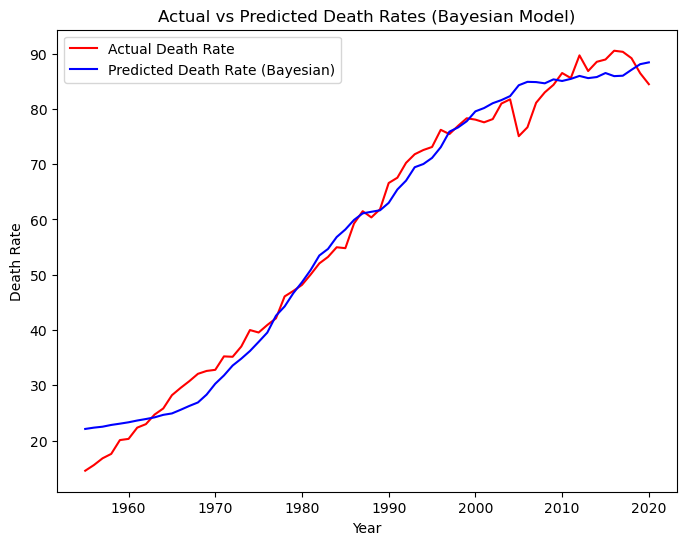

In [301]:
posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["Death"], model=hungary_model)
# print(posterior_predictive.posterior_predictive)
predicted_deaths = posterior_predictive.posterior_predictive["Death"].mean(dim=["chain", "draw"])

# Plot true vs predicted death rates
plt.figure(figsize=(8,6))
plt.plot(data_hun["Year"], data_hun["Death"], color="red", label="Actual Death Rate")
plt.plot(data_hun["Year"], predicted_deaths, color="blue", label="Predicted Death Rate (Bayesian)")
plt.xlabel("Year")
plt.ylabel("Death Rate")
plt.title("Actual vs Predicted Death Rates (Bayesian Model)")
plt.legend()
plt.show()

Here, A Bayesian statistical model is used to predict death rate, and the results predicted by the model are compared with the actual observed mortality. The plot illustrates that the Bayesian model closely follows the trends of the actual death rates

## Conclusion:

![Literate_Programming](smoke.jpg)

**Parameter Stability and Influence**:  
The analysis revealed that cigarette sales had a significant and consistent impact on mortality rates, while the effects of pollutants were less obviouos, shadowed by the influence of smoking.

**Predictive Insights**:  
The predictions from the Bayesian model highlighted areas where interventions might be necessary, particularly focusing on factors like pollution control and public health spending which displayed considerable impact on mortality rates.

**Data Integration Success and Model Performance**:  
We successfully integrated data from multiple sources, which has enhanced the accuracy and comprehensiveness of our analysis.

The Bayesian model used for predicting death rates showed high accuracy, closely mirroring the actual data, with a notable performance in predicting trends over the years.

**Technical Implementation**:  
The use of advanced statistical techniques, including Bayesian methods, provided deep insights into the factors influencing mortality rates and demonstrated the robustness of our analytical approach.


**Recommendations**:

![Literate_Programming](p1.jpg)

- **Public Health Policies**:  
The findings support the need for targeted public health interventions that reduce cigarette consumption and pollution exposure. Policymakers should consider these insights in their strategic planning such as prioritize smoking intervention to reduce lung cancer deaths.

- **Further Research**:  
Due to the variability observed in the effects of pollutants, further research is recommended to refine these estimates and incorporate additional variables that might influence the outcomes.

- **Model Refinement**:  
The Bayesian model should be continuously updated with new data and possibly adjusted to include more predictors to improve its predictive power and reliability.

![Literate_Programming](thanks.jpg)